# Installing dash and importing needed libraries

In [2]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import html, dcc, Input, Output
import threading
from google.colab import output

# Getting data from .csv using pandas

In [4]:
df = pd.read_csv('coronavirus_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180477 entries, 0 to 180476
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    180477 non-null  int64  
 1   iso_code                 180477 non-null  object 
 2   continent                180477 non-null  object 
 3   location                 180477 non-null  object 
 4   date                     180477 non-null  object 
 5   total_cases              173493 non-null  float64
 6   new_cases                173212 non-null  float64
 7   total_deaths             155323 non-null  float64
 8   new_deaths               155095 non-null  float64
 9   hosp_patients            27152 non-null   float64
 10  total_tests              78326 non-null   float64
 11  new_tests                74509 non-null   float64
 12  tests_per_case           92600 non-null   float64
 13  total_vaccinations       46366 non-null   float64
 14  peop

# Analysis of population

In [6]:
df_pop = df[['location', 'population']].drop_duplicates()

In [7]:
df_pop = df_pop.sort_values(by='population', ascending=False).head(10)
df_pop

,location,population
33499,China,1.444216e+09
74570,India,1.393409e+09
170959,United States,3.329151e+08
75441,Indonesia,2.763618e+08
122998,Pakistan,2.251999e+08
21805,Brazil,2.139934e+08
118134,Nigeria,2.114007e+08
12663,Bangladesh,1.663035e+08
133450,Russia,1.459120e+08
103850,Mexico,1.302622e+08


<ipython-input-8-61b846fdb5d2>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  pop_chart.set_xticklabels(pop_chart.get_xticklabels(), rotation=60)


[Text(0, 0, 'China'),
 Text(1, 0, 'India'),
 Text(2, 0, 'United States'),
 Text(3, 0, 'Indonesia'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Brazil'),
 Text(6, 0, 'Nigeria'),
 Text(7, 0, 'Bangladesh'),
 Text(8, 0, 'Russia'),
 Text(9, 0, 'Mexico')]

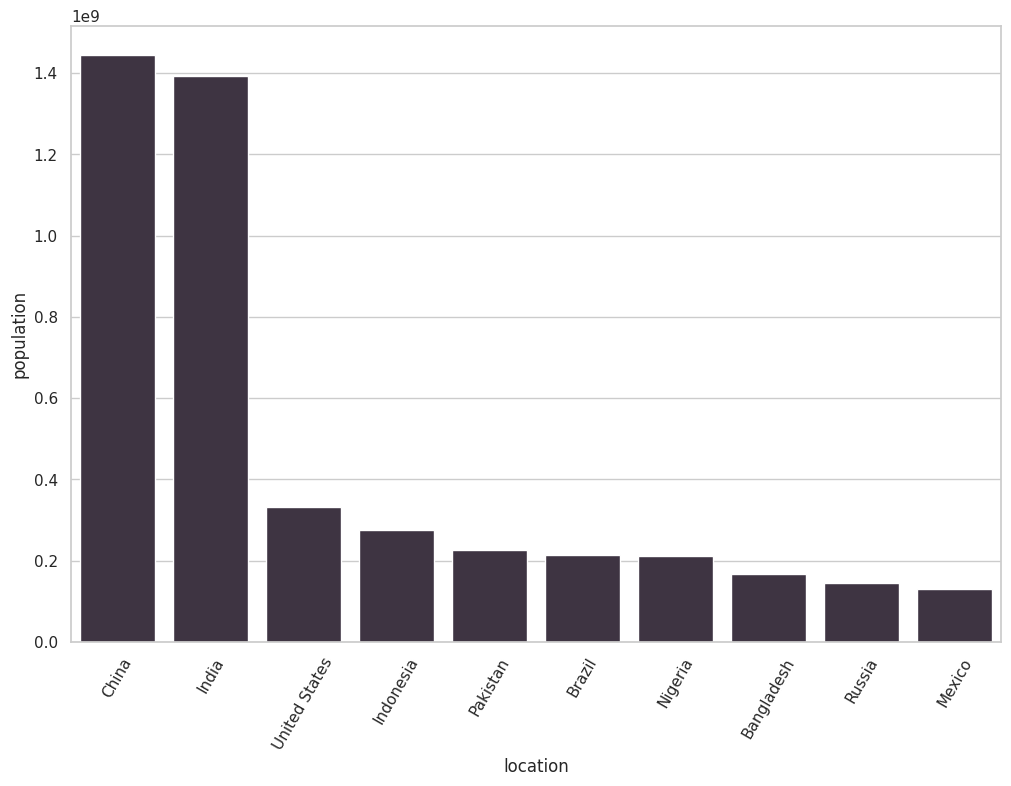

In [8]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
pop_chart = sns.barplot(x='location',
                               y='population',
                               data=df_pop,
                               color='#3F3244')
pop_chart.set_xticklabels(pop_chart.get_xticklabels(), rotation=60)

# Analysis of life expectancy

In [9]:
df_pop_lifeexp = df[['location', 'continent', 'population', 'life_expectancy']].drop_duplicates()

In [10]:
pop_lifeexp_chart = px.scatter(data_frame=df_pop_lifeexp,
                               x='population',
                               y='life_expectancy',
                               color='continent',
                               color_discrete_sequence=px.colors.qualitative.Prism,
                               title='Life expectancy vs. population by continent',
                               log_x=True)

In [11]:
pop_lifeexp_chart

# Analysis of COVID-19 new cases in Germany and Russia

In [12]:
df_new_cases = df[['location', 'date', 'new_cases']]
countries = ['Germany', 'Russia']
df_new_cases = df_new_cases[df_new_cases['location'].isin(countries)]

In [13]:
ttl_cases_chart = px.line(data_frame=df_new_cases,
                          x='date', y='new_cases',
                          color='location',
                          color_discrete_sequence=px.colors.qualitative.T10,
                          title='COVID-19 - new cases daily in Russia and Germany')

In [14]:
ttl_cases_chart

# Analysis of total cases in each country and plotting data on an interactive map

In [15]:
df_map = df[df['date'] == df['date'].max()]

In [16]:
df_map['cases_per_person'] = df_map['total_cases'] / df_map['population']

<ipython-input-16-75b9057eabc9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
my_mapbox_token = 'pk.eyJ1Ijoib21lZ2FwaCIsImEiOiJjbHU1bW14cWwweXR1MmpuNDBrYWRrc2p0In0.JqpHZHfWXQxlTWR7US-5PA'
px.set_mapbox_access_token(my_mapbox_token)

In [18]:
cases_map = px.scatter_mapbox(data_frame=df_map,
                                  lat='latitude',
                                  lon='longitude',
                                  color='continent',
                                  size='cases_per_person',
                                  size_max=8,
                                  hover_data={'location': True,
                                              'total_cases': True,
                                              'continent': False,
                                              'cases_per_person': False,
                                              'latitude': False,
                                              'longitude': False,
                                              },
                                  zoom=0.8,
                                  mapbox_style='dark',
                                  title='COVID-19 map - positive cases per person')

In [19]:
cases_map.update_layout(width=1200, height=700)
cases_map

# Dashboard 1
Creating two graphs and displaying them on dashboard:
1. Cummulative number of positive cases
2. Cummulative number of deaths

User can choose a country for displayed graphs.



In [20]:
df_dash_1 = df

In [21]:
countries_list = list(df_dash_1['location'].drop_duplicates())

In [22]:
first_dash_app = dash.Dash()

first_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose country:"),
    dcc.Dropdown(
        id='country',
        options=[{'value': str(country), 'label': country}
                 for country in countries_list],
        value=countries_list[0]
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="graph-1", style={'display': 'inline-block', 'width': '48%'}),
        dcc.Graph(id="graph-2", style={'display': 'inline-block', 'width': '48%'})
    ])
])


@first_dash_app.callback(
    Output(component_id='graph-1', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_first_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_cases',
        title=f'Cummulative number of positive cases in {country}',
        labels={'total_cases': 'Total cases'}
    )
    return fig


@first_dash_app.callback(
    Output(component_id='graph-2', component_property='figure'),
    Input(component_id='country', component_property='value')
)
def generate_second_graph(country):
    df = df_dash_1[df_dash_1['location'] == country]
    fig = px.line(
        data_frame=df,
        x='date',
        y='total_deaths',
        title=f'Cummulative number of deaths in {country}',
        labels={'total_deaths': 'Total deaths'}
    )
    return fig

In [23]:
thread = threading.Thread(target=first_dash_app.run_server)
thread.start()
output.serve_kernel_port_as_window(port=8050)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dashboard 2

Creating an interactive map graph with COVID-19 statistics.

User can choose a continent and a statistic:
- total cases
- total deaths
- total tests
- total vaccinations
- number of fully vaccinated people

In [24]:
df_dash_2 = df[df['date'] == df['date'].max()].fillna(0)

In [25]:
metric_dict = {'total_cases': 'Total cases',
               'total_deaths': 'Total deaths',
               'total_tests': 'Total tests',
               'total_vaccinations': 'Total vaccinations',
               'people_fully_vaccinated': 'Number of fully vaccinated people'}

In [26]:
continent_list = list(df_dash_2['continent'].drop_duplicates())

In [27]:
second_dash_app = dash.Dash()

second_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose continent:"),
    dcc.Dropdown(
        id='continent',
        options=[{'value': str(continent), 'label': continent}
                 for continent in continent_list],
        value=continent_list[0]
        ),
    html.P("Choose metric:"),
    dcc.Dropdown(
        id='metric',
        options=[{'value': metric, 'label': metric_label}
                 for metric, metric_label in metric_dict.items()],
        value='total_cases'
        ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id="map"),
    ])

])

@second_dash_app.callback(
    Output(component_id='map', component_property='figure'),
    [Input(component_id='continent', component_property='value'),
    Input(component_id='metric', component_property='value')]
)
def generate_covid_map(continent, metric):
    df = df_dash_2[df_dash_2['continent'] == continent]
    map = px.scatter_mapbox(
        data_frame=df,
        lat='latitude',
        lon='longitude',
        size=df[metric],
        size_max=20,
        hover_data={'location': True},
        mapbox_style='dark',
        zoom=1,
        height=600,
        title=f'COVID-19 - {metric_dict[metric]} in {continent}'
    )
    return map

In [28]:
thread = threading.Thread(target=second_dash_app.run_server)
thread.start()
output.serve_kernel_port_as_window(port=8050)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dashboard 3
Creating two graphs and displaying them on dashboard:
1. Ranking of countries with the greatest number of vaccinations.
2. Ranking of countries with the best vaccination ratio.

User can choose a number of countries to display.

In [29]:
third_dash_app = dash.Dash()

third_dash_app.layout = html.Div([
    html.Div([
        html.H1('COVID-19 Tracker')
    ]),
    html.P("Choose top x countries:"),
    dcc.Slider(5, 20, 5,
        value=5,
        id='my-slider'
    ),
    html.Br(),
    html.Div(children=[
        dcc.Graph(id='first-graph', style={'display':'inline-block', 'width': '48%'}),
        dcc.Graph(id='second-graph', style={'display':'inline-block', 'width': '48%'})
    ])

])

In [30]:
@third_dash_app.callback(
    Output(component_id='first-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccinations_graph(n):
    max_date = df['date'].max()
    df_1 = df[df['date'] == max_date].sort_values(by='total_vaccinations', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df_1,
        x='location',
        y='total_vaccinations',
        title=f'Number of vaccinations',
        labels={'total_vaccinations': 'Total vaccinations'}
    )
    return fig

@third_dash_app.callback(
    Output(component_id='second-graph', component_property='figure'),
    [Input(component_id='my-slider', component_property='value')]
)
def generate_vaccination_ratio_graph(n):
    max_date = df['date'].max()
    df_1 = df[df['date'] == max_date]
    df_1['vaccination_ratio'] = df_1['total_vaccinations'] / df_1['population']
    df_1 = df_1.sort_values(by='vaccination_ratio', ascending=False).head(n).fillna(0)
    fig = px.bar(
        data_frame=df_1,
        x='location',
        y='vaccination_ratio',
        title=f'Vaccination ratio',
        labels={'vaccination_ratio': 'Vaccination ratio'}
    )
    return fig

In [31]:
thread = threading.Thread(target=third_dash_app.run_server)
thread.start()
output.serve_kernel_port_as_window(port=8050)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>